<a href="https://colab.research.google.com/github/Grupo242022/Intro_AA/blob/main/Rta_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

# **Introducción al Aprendizaje Automático**

## Entregable # 1 

## GRUPO Nº24

## INTEGRANTES:
   - Clarisa Manzone
   - Nico Rosales
   - Daniel Rubio
   - Diana Fonnegra   
   ------

   ### *Para el desarrollo de este Laboratorio se realizaron las siguientes etapas:

# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
# En primer lugar vamos a importar algunas de las librerías que vamos a utilizar:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (8.5,8.5)})

import warnings
warnings.filterwarnings('ignore')


from sklearn import datasets, linear_model


## Carga del Conjunto de Datos

* Cargamos el conjunto de datos y vemos su contenido.

In [2]:
# Importamos el conjunto de datos desde la librería de scikit-learn
from sklearn.datasets import load_boston
boston = load_boston()

# Exploramos la información contenida en el dataset:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [3]:
# Mostramos las características del dataset
print('Características del dataset:')
print(boston.DESCR)

Características del dataset:
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 

In [4]:
# print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
print('Nombres columnas:')
boston['feature_names']  # nombres de los atributos para cada columna de 'data'

Nombres columnas:


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
#Podemos verificar la cantidad de datos que hay en los dataset
print('Cantidad de datos:')
boston['data'].shape, boston['target'].shape

Cantidad de datos:


((506, 13), (506,))

In [6]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [7]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape


((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
----

- Rta// Se trata de un conjunto de datos que representa el costo de las viviendas de Boston dado un número de habitaciones. Presenta caracteristicas como: 506 registros, 13 variables entre numéricas/categóricas y un valor de Mediana (atributo 14 - denominado: target). A su vez este conjunto de datos no presenta valores faltantes.

Nota 1: En la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html), se presenta una advertencia que indica:
   - El conjunto de datos sobre los precios de la vivienda en Boston tiene un problema ético: los autores de este conjunto de datos diseñaron una variable "B", la cual supone que la autosegregación racial tenía un impacto positivo en los precios de la vivienda.
    A su vez argumentan que: *el objetivo de la investigación que condujo a la creación de este conjunto de datos era estudiar el impacto de la calidad del aire, pero no se demostró adecuadamente la validez de esta suposición*.
   - Por lo tanto, desaconsejan el uso de este conjunto de datos a menos que el propósito del código sea estudiar y educar sobre cuestiones éticas en la ciencia de datos y el aprendizaje automático.

----

¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
- Rta// La variable objetivo es un valor de Mediana (atributo 14 - denominado: target), expresado en unidades de $1000.

----
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
- Rta// Las variables disponibles son:
        - CRIM: tasa per cápita de crimen para la ciudad.
        - ZN: proporción de terrenos residenciales con zonificación para lotes de más de 25.000 pies cuadrados.
        - INDUS: proporción de acres comerciales no minoristas por ciudad.
        - CHAS: Charles River dummy variable (= 1 si el tramo linda con el río; 0 en caso contrario).
        - NOX: concentración de óxidos nítricos (partes por 10 millones).
        - RM: número medio de habitaciones por vivienda.
        - AGE: proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
        - DIS: distancias ponderadas a cinco centros de empleo de Boston.
        - RAD: índice de accesibilidad a las autopistas radiales.
        - TAX: tasa de impuesto sobre la propiedad de valor total por 10.000 dólares.
        - PTRATIO: tasa alumno-profesor por ciudad.
        -  B -> 1000(Bk - 0.63)^2: donde Bk es la proporción de población negra por ciudad.
        - LSTAT: porcentaje de población de menor estatus.
        - MEDV: valor medio de las viviendas ocupadas por sus propietarios en miles de dólares.

---
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
- Rta// Las posibles variables determinantes son:
  - RM
  - TAX
  - RAD

---
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.      

- Rta// Dentro de los posibles sesgos de información se encuentran: 
  -  B -> 1000(Bk - 0.63)^2:  la proporción de población negra por ciudad. A su vez, LSTAT : el porcentaje de población con “menor estatus”.
Ya que induce a la idea que esta población pueda ser peligrosa o significativa a la hora de escoger una vivienda o el valor del mismo. 



---
## Ejercicio 2: [Visualización de los Datos](https://chrispfchung.github.io/model%20data/boston-housing-data/)

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
- Rta//: 
    - Para la visualización de las variables, construimos inicialmente un data frame e identificamos el valor a estimar (target - MEDV).
    - Luego para obtener las relaciones entre las variables iteramos sobre el número de columnas y usamos el modulo `scatter`. Finalmente, generamos los gráficos.


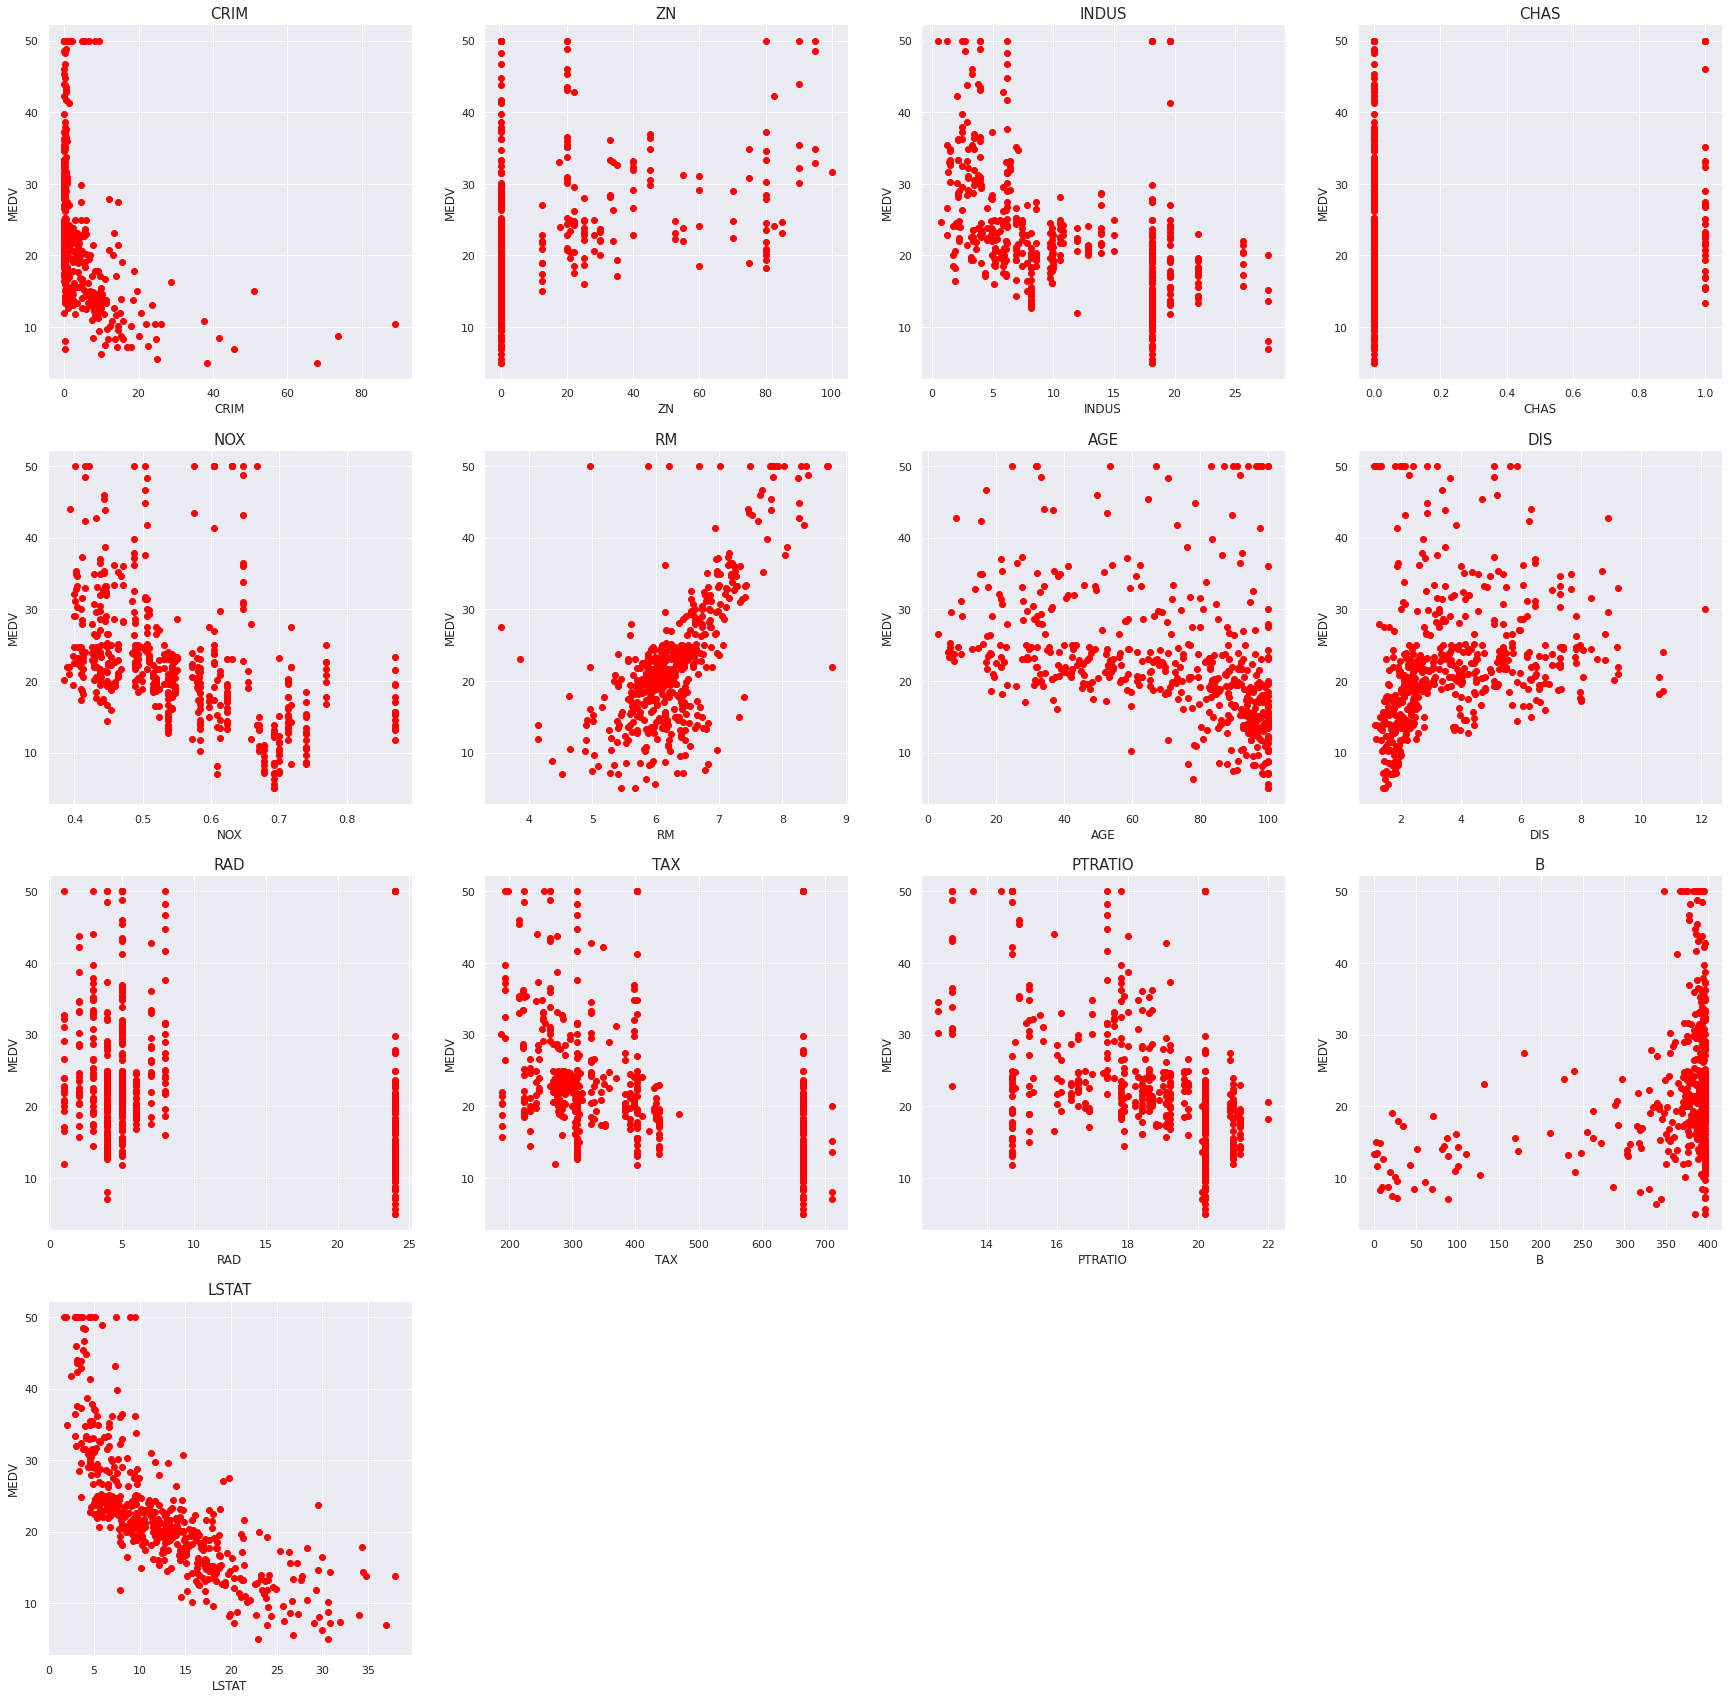

In [8]:
# Visualización 

features = df.columns
target = boston['target']
plt.figure(figsize=(30,30))
for index, feature_name in enumerate(features):
    # 4 rows of plots, 13/2 == 4 plots per row, index+1 where the plot begins
    plt.subplot(4,len(features)/3, index+1)
    plt.scatter(df[feature_name], target, color='red')
    plt.title(feature_name, fontsize=15)
    plt.xlabel(feature_name, fontsize=12)
    plt.ylabel('MEDV', fontsize=12)

---
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
- Rta//: las variables que parecen estar relacionadas, mostrando una tendencia:
    - Lstat vs MEDV
    - RM vs MEDV
    - NOX vs MEDV


---
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.
- Rta//:
Los valores a los que consideramos más relevantes serían:
1. Número medio de habitaciones por vivienda.
2. Tasa de impuesto sobre la propiedad de valor total.
3. Tasa per cápita de crimen para la ciudad.
4. Concentración de óxidos nítricos.
5. Índice de accesibilidad a las autopistas.
6. Proporción de acres comerciales no minoristas por ciudad.
---

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
 - Rta//:


In [19]:
# 1. Considerando la variable número de habitaciones:
# Seleccionamos al atributo 'RM' como nuestra variable independiente 
# y el objetivo como nuestra variable dependiente
# Para ello definimos:
X_RM, y = boston.data[:, np.newaxis, 5], boston['target']


2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
 - Rta//:


In [20]:
# 2. Instanciando y entrenando el modelo:

from sklearn.model_selection import train_test_split

# Dividimos el conjunto de datos:
x_train, x_test, y_train, y_test = train_test_split = train_test_split(X_RM, y, train_size=0.8, random_state=0) # test_size=0.2

print('--- --- --- --- --- --- --- --- --- --- --- ---')
print(f'x_train.shape, x_test.shape: {x_train.shape, x_test.shape}')
print('--- --- --- --- --- --- --- --- --- --- --- ---')

#Instanciamos el algoritmo de regresión lineal a utilizar
lr = linear_model.LinearRegression()

#Entreno el modelo
lr.fit(x_train, y_train)

--- --- --- --- --- --- --- --- --- --- --- ---
x_train.shape, x_test.shape: ((404, 1), (102, 1))
--- --- --- --- --- --- --- --- --- --- --- ---


LinearRegression()

3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
- Rta//:


In [42]:
# 3. Realizo una predicción utilizando el modelo entrenado
from sklearn.metrics import mean_squared_error
# evaluacion sobre el conjunto de entrenamiento
y_train_predict = lr.predict(x_train)

# evaluacion sobre el conjunto de testeo
y_test_predict = lr.predict(x_test)

In [38]:
# Exploramos las predicciones realizadas por el modelo:
y_test_predict

array([22.90445223, 21.80741526, 23.2795076 , 13.67809006, 21.95743741,
       18.22563646, 18.89135974, 19.48207195, 10.15256956, 23.5795519 ,
       19.37893173, 25.94240075, 22.9794633 ,  7.1427502 , 36.67836079,
       29.54293232, 22.05120126, 31.84952286, 24.90162209, 18.37565861,
       23.77645597, 18.65695014, 20.97291706, 24.30153349, 16.80042604,
       -0.25521702, 19.4539428 , 17.05358842, 39.1818554 , 20.64474361,
       21.51674735, 20.54160338, 21.90117911, 20.67287276, 23.68269213,
       17.93496854, 19.66022326, 18.61006821, 23.04509799, 21.30109051,
       20.97291706, 17.77557001, 21.13231559, 14.40944804, 24.84536378,
       23.72957405, 17.81307555, 20.99166983,  9.49622266, 26.59874765,
       21.20732667, 16.68790943, 19.60396495, 40.96336842, 17.50365486,
       18.74133759, 17.02545926, 18.82572505, 17.50365486, 19.40706088,
       18.69445567, 20.84164768, 28.98972565, 24.95788039, 17.09109396,
       24.99538593, 25.92364798, 23.31701314, 27.77079569, 18.76

4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.


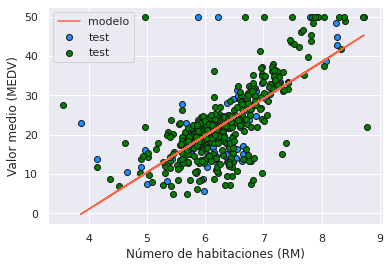

In [39]:
#Graficamos los datos del dataset junto con el modelo

plt.scatter(x_test, y_test, facecolor="dodgerblue", edgecolor="k", label="test")
plt.scatter(x_train, y_train, color='green', edgecolor="k", label="test")
plt.plot(x_test, y_test_predict, color="tomato", linewidth=1.5, label="modelo")
plt.xlabel('Número de habitaciones (RM)')
plt.ylabel('Valor medio (MEDV)')
plt.legend()
plt.show()

5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

----

In [43]:
# Obtenemos los coeficientes calculados por el modelo:
print('DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE')
print('--- --- --- --- --- --- --- --- --- --- --- ---')
print('Valor de la pendiente o coeficiente "a": ', lr.coef_)
print('Valor de la intersección o coeficiente "b": ', lr.intercept_)
print('--- --- --- --- --- --- --- --- --- --- --- --- \n')

# Analizamos la exactitud del modelo usando score:
print('Precisión del modelo entrenamiento (Train):')
print(round(lr.score(x_train, y_train),3))
print('--- --- --- --- --- --- --- --- --- --- --- --- \n')
print('Precisión del modelo prueba (Test):')
print(round(lr.score(x_test, y_test),3))



DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE
--- --- --- --- --- --- --- --- --- --- --- ---
Valor de la pendiente o coeficiente "a":  [9.37638431]
Valor de la intersección o coeficiente "b":  -36.476189627647315
--- --- --- --- --- --- --- --- --- --- --- --- 

Precisión del modelo entrenamiento (Train):
0.497
--- --- --- --- --- --- --- --- --- --- --- --- 

Precisión del modelo prueba (Test):
0.424


# Conclusiones:
- Con respecto al anterior podemos notar que el modelo en el entrenamiento presento un mejor desempeño -> 0.497, frente al modelo de prueba -> 0.424 para la métrica `score`.

- También podemos inferir por el resultado del score: que el modelo no es el mejor para explicar el conjunto de datos. 

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [ ]:
# 1. Resolver acá.

In [ ]:
# 2. Graficar curvas de error acá.

In [ ]:
# 4. Reconstruir mejor modelo acá y graficar.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [ ]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == 'CRIM') | (boston['feature_names'] == 'ZN')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 2), (102, 2))

In [ ]:
# 2. Resolver acá.

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
